In [3]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib
import sklearn.linear_model
%matplotlib inline

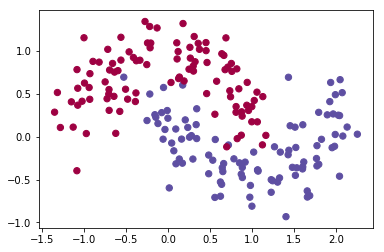

In [4]:
# Create a random dataset
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=.2)
plt.scatter(X[:,0], X[:,1], s = 40, c=y, cmap=plt.cm.Spectral)

In [16]:
# Plot decision boundary
def plot_decision_boundary(pred_func):
    # set min and max values and give it some padding
    x_min, x_max = X[:,0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:, 1].max() + .5
    h=.01
    # generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # plot the contour and training examples
    plt.contourf(xx,yy,Z,cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.Spectral)

In [17]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X,y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

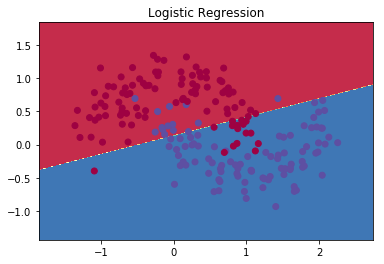

In [18]:
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

In [19]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# gradient descent parameters
epsilon = .01 # learning rate
reg_lambda = .01 # regularization strength

In [20]:
# evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calcuating the loss
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs)
    # Add regularization term to loss 
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [21]:
# predict an output
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [22]:
# This function learns parameters for the neural network and returns the model
# nn_hdim: number of nodes in the hidden layer
# num_passes: number of passes through the training data for gradient descent
# print_loss: if true, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes = 20000, print_loss = False):
    # intialize the parameters to random values
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    # This is what we return at the end
    model = {}
    # gradient descent 
    for i in range(0, num_passes):
        # forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        # back propagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1,2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
        # add regularization terms
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        # gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        # assign new parameters to the model
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        # optionally print the loss (expensive process)
        if print_loss and i % 1000 == 0:
            print("loss after iteration %i : %f" %(i, calculate_loss(model)))
    return model

loss after iteration 0 : 0.432387
loss after iteration 1000 : 0.068947
loss after iteration 2000 : 0.068918
loss after iteration 3000 : 0.070752
loss after iteration 4000 : 0.070748
loss after iteration 5000 : 0.070751
loss after iteration 6000 : 0.070754
loss after iteration 7000 : 0.070756
loss after iteration 8000 : 0.070757
loss after iteration 9000 : 0.070758
loss after iteration 10000 : 0.070758
loss after iteration 11000 : 0.070758
loss after iteration 12000 : 0.070758
loss after iteration 13000 : 0.070758
loss after iteration 14000 : 0.070758
loss after iteration 15000 : 0.070758
loss after iteration 16000 : 0.070758
loss after iteration 17000 : 0.070758
loss after iteration 18000 : 0.070758
loss after iteration 19000 : 0.070758


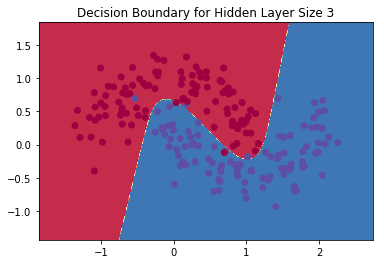

In [23]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for Hidden Layer Size 3")

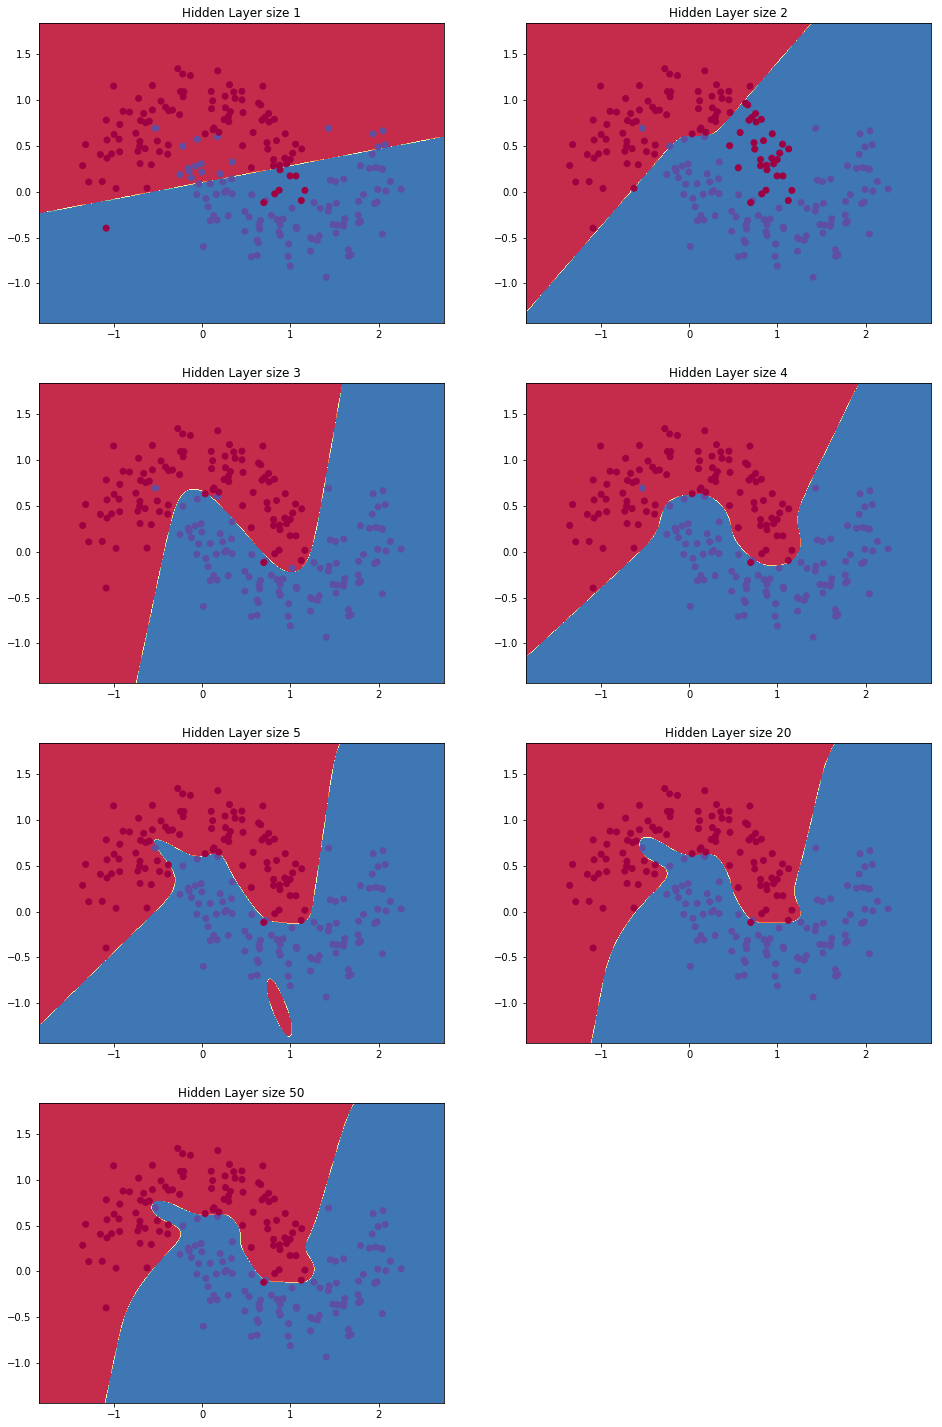

In [29]:
# How to vary hidden layer size
plt.figure(figsize=(16,32))
hidden_layer_dimensions = [1,2,3,4,5,20,50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5,2,i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model,x))
plt.show()


In [1]:
import os

os.system('jupyter nbconvert --to html Neural Network Example.ipynb')

-1